# Outlier detection in SMACOF solutions

In [1]:
from scripts.ClusterTS_MDS import ClusterMDS

import numpy as np
from matplotlib.pyplot import subplots
from matplotlib import rcParams
from sklearn.cluster import HDBSCAN
from sklearn.metrics.cluster import silhouette_score, calinski_harabasz_score, davies_bouldin_score

rcParams.update({
    "text.usetex": True,
    "font.size": 16
})

In [2]:
PTEX_dissim = np.loadtxt("./data/PTEX_DTW_matrix.dat", dtype= np.float64, delimiter = ",")
PTEX_dissim.shape

(4313, 4313)

SMACOF-dissim-classic with 2 components has a stress-1 value of 0.102424


np.float64(0.10242396776234279)

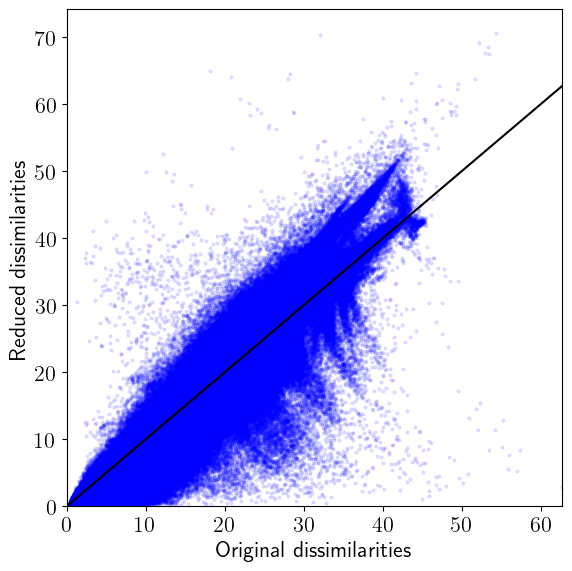

In [3]:
TEC_ClusterSeries = ClusterMDS(dissimilarity = PTEX_dissim)
TEC_ClusterSeries.ComputeMDS(num_comps_mds = 2, method = "SMACOF-dissim-classic", max_iter = 1000, eps = 1e-6, verbose = 0)

--Scores with K-Means clustering--
SH coefficient = 0.7141903227962619
CH index = 12206.369421621399
DB index = 0.449730716637718
--Total series for every cluster--
0 -> 1244
1 -> 621
2 -> 2448


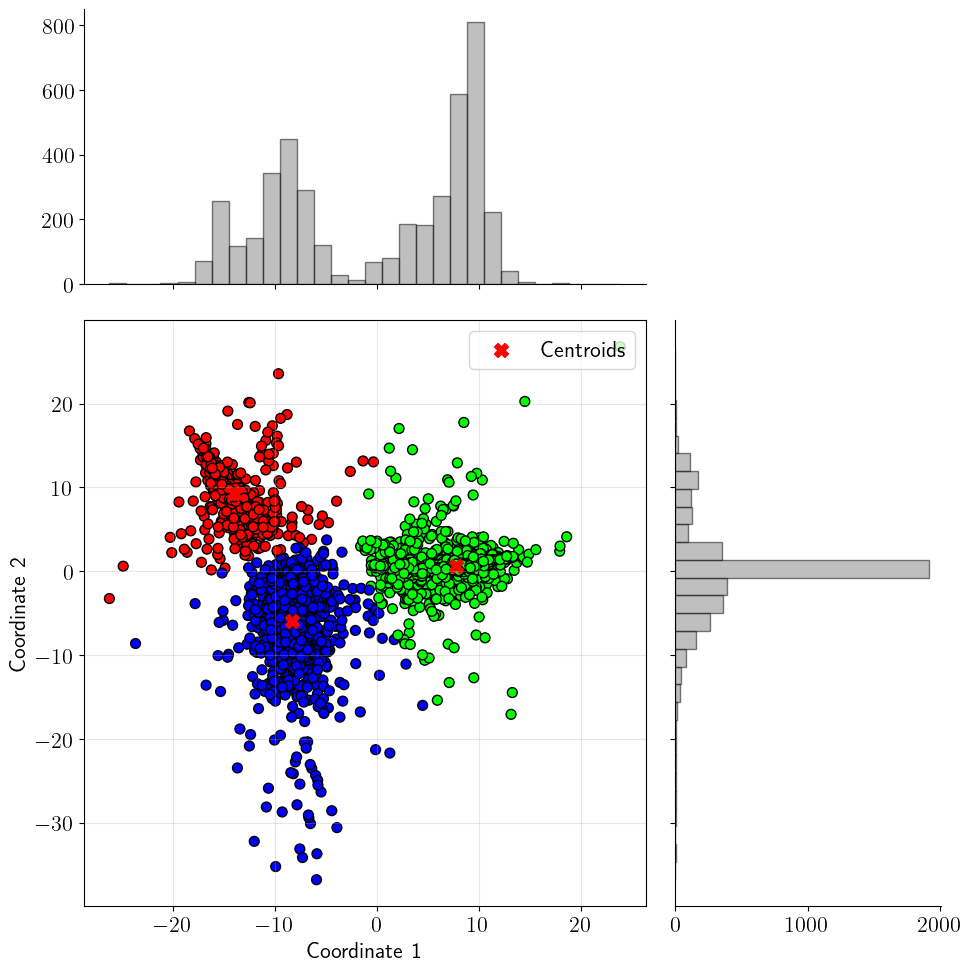

In [4]:
TEC_ClusterSeries.ClusterTSVectors(num_clusters = 3, cluster_method = "K-Means")
TEC_ClusterSeries.VisualizeClustering()

## Outlier detection using HDBSCAN

In [5]:
min_cluster_size_list = tuple(range(5, 55, 5))
SC_cluster_scores =[0]*len(min_cluster_size_list)
CH_cluster_scores =[0]*len(min_cluster_size_list)
DB_cluster_scores =[0]*len(min_cluster_size_list)
number_found_clusters = [0]*len(min_cluster_size_list)

for k, num_samples in enumerate(min_cluster_size_list):
    HDBSCAN_Out = HDBSCAN(min_cluster_size = num_samples).fit(TEC_ClusterSeries.Xc_TS)
    SC_cluster_scores[k] = silhouette_score(TEC_ClusterSeries.Xc_TS, HDBSCAN_Out.labels_)
    CH_cluster_scores[k] = calinski_harabasz_score(TEC_ClusterSeries.Xc_TS, HDBSCAN_Out.labels_)
    DB_cluster_scores[k] = davies_bouldin_score(TEC_ClusterSeries.Xc_TS, HDBSCAN_Out.labels_)
    number_found_clusters[k] = len(np.unique(HDBSCAN_Out.labels_))

maximum_SC_coeff = np.argmax(SC_cluster_scores)
maximum_CH_index = np.argmax(CH_cluster_scores)
minimum_DB_index = np.argmin(DB_cluster_scores)
print("Optimal number of neighbours by SC score: ", min_cluster_size_list[maximum_SC_coeff])
print("Number of clusters given by maximum SC score: ", number_found_clusters[maximum_SC_coeff])
print("Optimal number of neighbours by CH score: ", min_cluster_size_list[maximum_CH_index])
print("Number of clusters given by maximum CH score: ", number_found_clusters[maximum_CH_index])
print("Optimal number of neighbours by DB score: ", min_cluster_size_list[minimum_DB_index])
print("Number of clusters given by minimum CH score: ", number_found_clusters[minimum_DB_index])

Optimal number of neighbours by SC score:  30
Number of clusters given by maximum SC score:  4
Optimal number of neighbours by CH score:  30
Number of clusters given by maximum CH score:  4
Optimal number of neighbours by DB score:  5
Number of clusters given by minimum CH score:  95


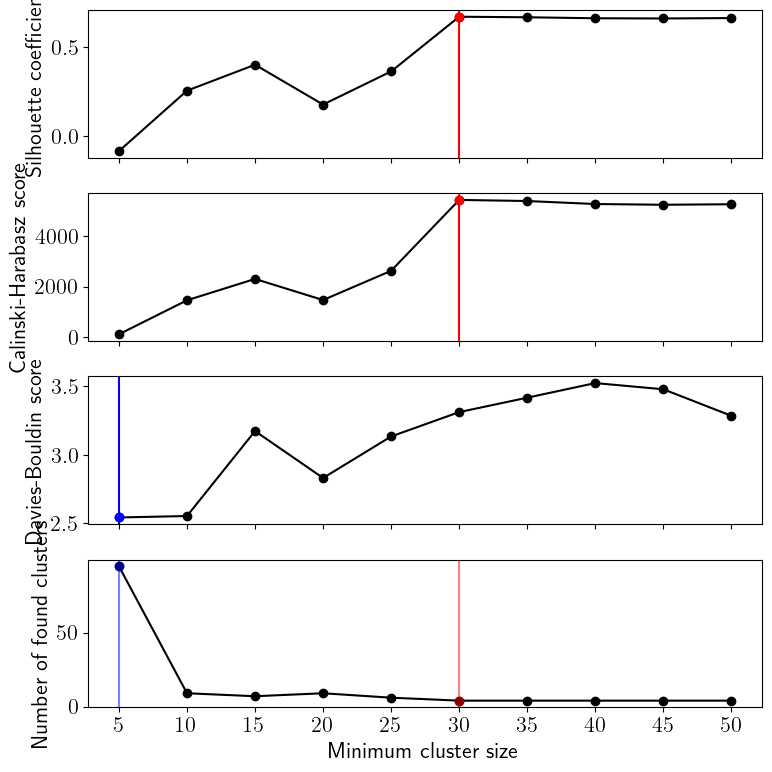

In [6]:
Figure, Subplot = subplots(4, 1, figsize = (8, 8), sharex = "col")

Subplot[0].axvline(min_cluster_size_list[maximum_SC_coeff], color = "red", zorder = 0)
Subplot[0].plot(min_cluster_size_list, SC_cluster_scores, "-ok", zorder = 1)
Subplot[0].scatter(min_cluster_size_list[maximum_SC_coeff], SC_cluster_scores[maximum_SC_coeff], c = "red", marker = "o", zorder = 2)

Subplot[1].axvline(min_cluster_size_list[maximum_CH_index], color = "red", zorder = 0)
Subplot[1].plot(min_cluster_size_list, CH_cluster_scores, "-ok", zorder = 1)
Subplot[1].scatter(min_cluster_size_list[maximum_CH_index], CH_cluster_scores[maximum_CH_index], c = "red", marker = "o", zorder = 2)

Subplot[2].axvline(min_cluster_size_list[minimum_DB_index], color = "blue", zorder = 0)
Subplot[2].plot(min_cluster_size_list, DB_cluster_scores, "-ok", zorder = 1)
Subplot[2].scatter(min_cluster_size_list[minimum_DB_index], DB_cluster_scores[minimum_DB_index], c = "blue", marker = "o", zorder = 2)

Subplot[3].axvline(min_cluster_size_list[minimum_DB_index], color = "blue", zorder = 0, alpha = 0.5)
Subplot[3].axvline(min_cluster_size_list[maximum_CH_index], color = "red", zorder = 0, alpha = 0.5)
Subplot[3].plot(min_cluster_size_list, number_found_clusters, "-ok", zorder = 1)
Subplot[3].scatter(min_cluster_size_list[maximum_CH_index], number_found_clusters[maximum_CH_index], c = "red", marker = "o", zorder = 2, alpha = 0.5)
Subplot[3].scatter(min_cluster_size_list[minimum_DB_index], number_found_clusters[minimum_DB_index], c = "blue", marker = "o", zorder = 2, alpha = 0.5)

Subplot[0].set_ylabel("Silhouette coefficient")
Subplot[1].set_ylabel("Calinski-Harabasz score")
Subplot[2].set_ylabel("Davies-Bouldin score")
Subplot[3].set_ylabel("Number of found clusters")
Subplot[3].set_xlabel("Minimum cluster size")
Subplot[3].set_xticks(min_cluster_size_list)

Figure.tight_layout()

Size for minimum cluster:  5
Counter({np.int64(-1): 1645, np.int64(14): 995, np.int64(6): 548, np.int64(91): 88, np.int64(82): 59, np.int64(40): 58, np.int64(16): 36, np.int64(83): 34, np.int64(53): 26, np.int64(49): 26, np.int64(20): 25, np.int64(23): 25, np.int64(87): 24, np.int64(88): 23, np.int64(9): 22, np.int64(90): 21, np.int64(45): 21, np.int64(12): 21, np.int64(60): 20, np.int64(21): 18, np.int64(92): 14, np.int64(13): 14, np.int64(71): 12, np.int64(85): 12, np.int64(1): 12, np.int64(3): 12, np.int64(19): 11, np.int64(52): 11, np.int64(65): 11, np.int64(62): 11, np.int64(8): 11, np.int64(50): 10, np.int64(89): 10, np.int64(22): 10, np.int64(48): 10, np.int64(27): 10, np.int64(39): 10, np.int64(69): 10, np.int64(25): 10, np.int64(66): 9, np.int64(67): 9, np.int64(79): 9, np.int64(36): 9, np.int64(47): 9, np.int64(31): 9, np.int64(72): 9, np.int64(43): 8, np.int64(64): 8, np.int64(18): 7, np.int64(38): 7, np.int64(17): 7, np.int64(5): 7, np.int64(86): 7, np.int64(81): 7, np.int6

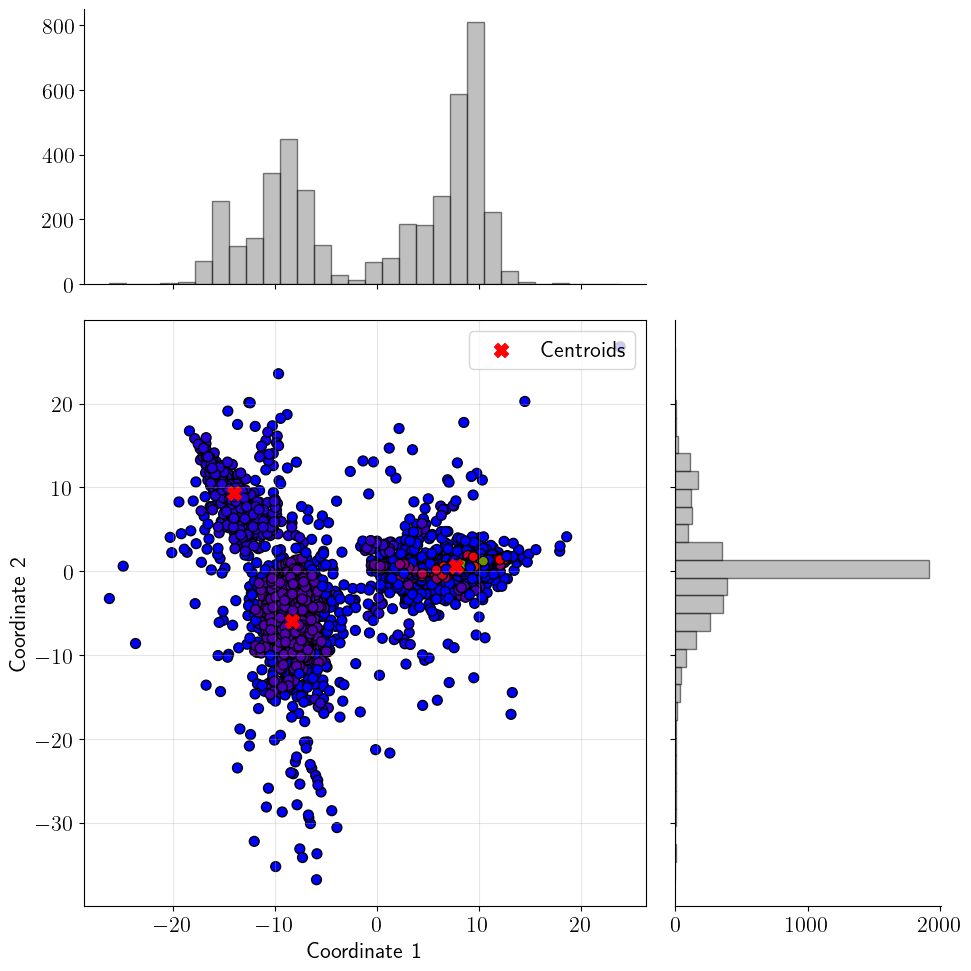

In [7]:
from collections import Counter

min_cluster_size = min(min_cluster_size_list[maximum_SC_coeff], min_cluster_size_list[maximum_CH_index], min_cluster_size_list[minimum_DB_index])

print("Size for minimum cluster: ", min_cluster_size)
HDBSCAN_Out = HDBSCAN(min_cluster_size = min_cluster_size).fit(TEC_ClusterSeries.Xc_TS)
print(Counter(HDBSCAN_Out.labels_))

TEC_ClusterSeries.VisualizeClustering(Labels = HDBSCAN_Out.labels_)

Size for minimum cluster:  30
Counter({np.int64(0): 2390, np.int64(1): 1100, np.int64(2): 535, np.int64(-1): 288})


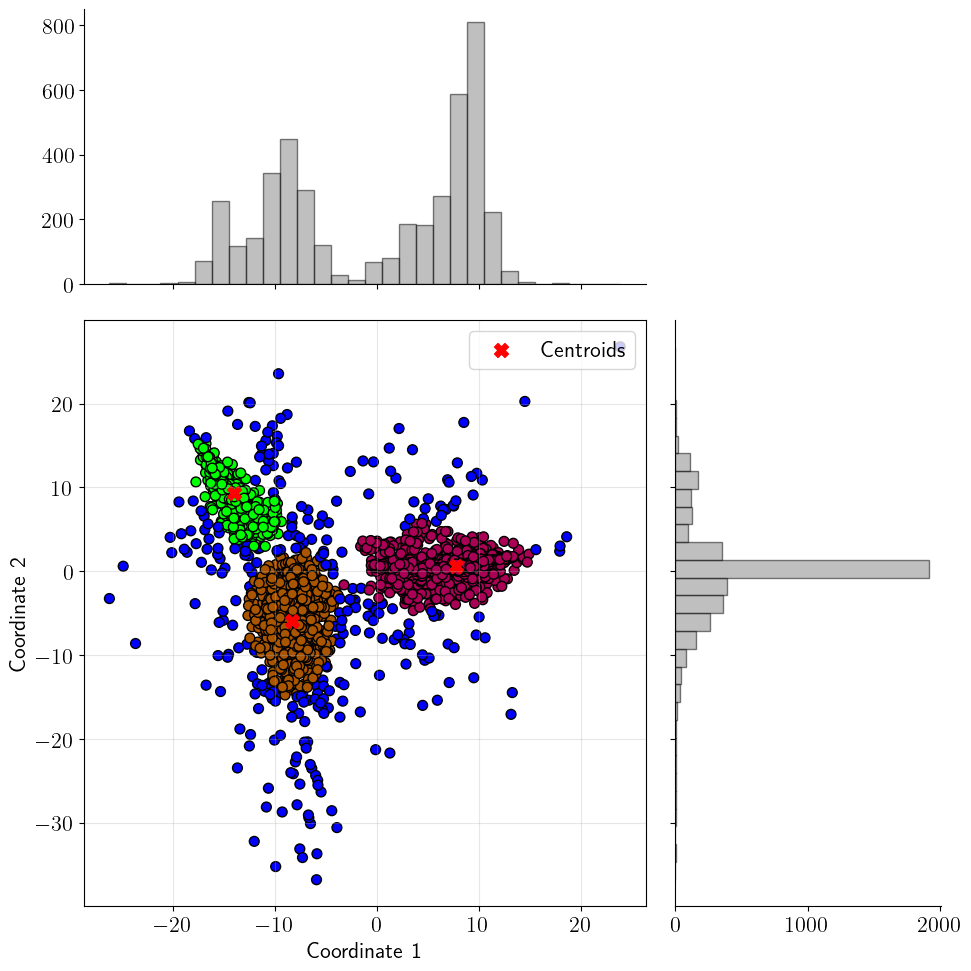

In [8]:
min_cluster_size = max(min_cluster_size_list[maximum_SC_coeff], min_cluster_size_list[maximum_CH_index], min_cluster_size_list[minimum_DB_index])

print("Size for minimum cluster: ", min_cluster_size)
HDBSCAN_Out = HDBSCAN(min_cluster_size = min_cluster_size).fit(TEC_ClusterSeries.Xc_TS)
print(Counter(HDBSCAN_Out.labels_))
HDBSCAN_cluster_labels = np.where(HDBSCAN_Out.labels_ == -1, 1, 0)

TEC_ClusterSeries.VisualizeClustering(Labels = HDBSCAN_Out.labels_)

## SMACOF solution without outliers given by DBSCAN

In [9]:
def RemoveSameRowsAndColumns(A:np.ndarray, index) -> np.ndarray:
    return np.delete(np.delete(A, index, 0), index, 1)

In [10]:
IndexOutliers = np.argwhere(HDBSCAN_Out.labels_ == -1)
IndexNotOutliers = np.argwhere(HDBSCAN_Out.labels_ != -1)

print("Number of outliers: ", IndexOutliers.size)
print("Percentage of outlier: ", 100*IndexOutliers.size/TEC_ClusterSeries.Xc_TS.shape[0])

PTEX_dissim_no_noise = RemoveSameRowsAndColumns(PTEX_dissim, IndexOutliers)
PTEX_dissim_no_noise.shape

Number of outliers:  288
Percentage of outlier:  6.6774866682123815


(4025, 4025)

SMACOF-dissim-classic with 2 components has a stress-1 value of 0.083919
--Scores with K-Means clustering--
SH coefficient = 0.7553186801400924
CH index = 18687.437115777895
DB index = 0.3655293958173651
--Total series for every cluster--
0 -> 2387
1 -> 535
2 -> 1103


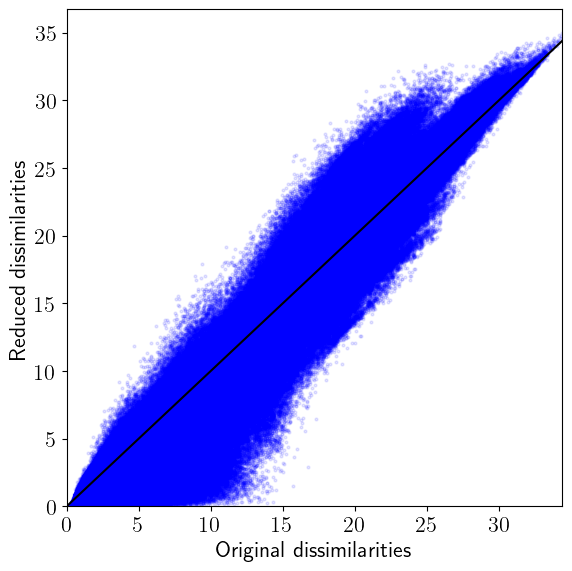

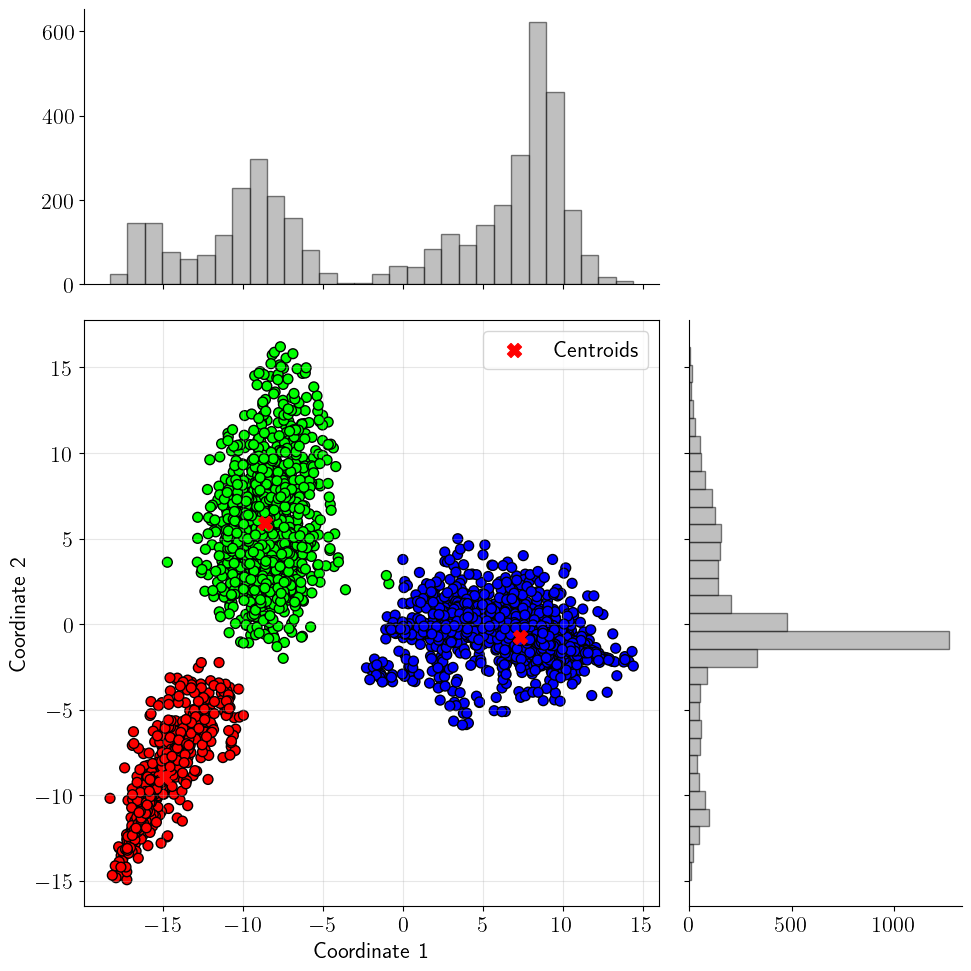

In [11]:
TEC_ClusterSeriesNoNoise = ClusterMDS(dissimilarity = PTEX_dissim_no_noise)
TEC_ClusterSeriesNoNoise.ComputeMDS(num_comps_mds = 2, method = "SMACOF-dissim-classic", max_iter = 1000, eps = 1e-6, verbose = 0)
TEC_ClusterSeriesNoNoise.ClusterTSVectors(num_clusters = 3, cluster_method = "K-Means")
TEC_ClusterSeriesNoNoise.VisualizeClustering()

In [12]:
PTEX_dissim_only_noise = RemoveSameRowsAndColumns(PTEX_dissim, IndexNotOutliers)
PTEX_dissim_only_noise.shape

(288, 288)

SMACOF-dissim-classic with 2 components has a stress-1 value of 0.226766


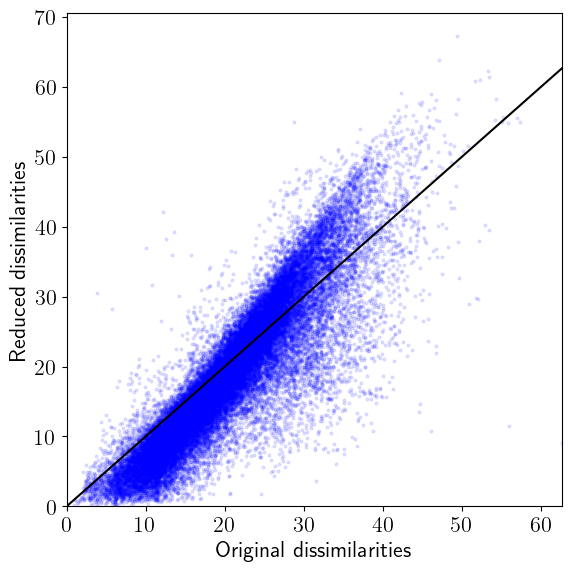

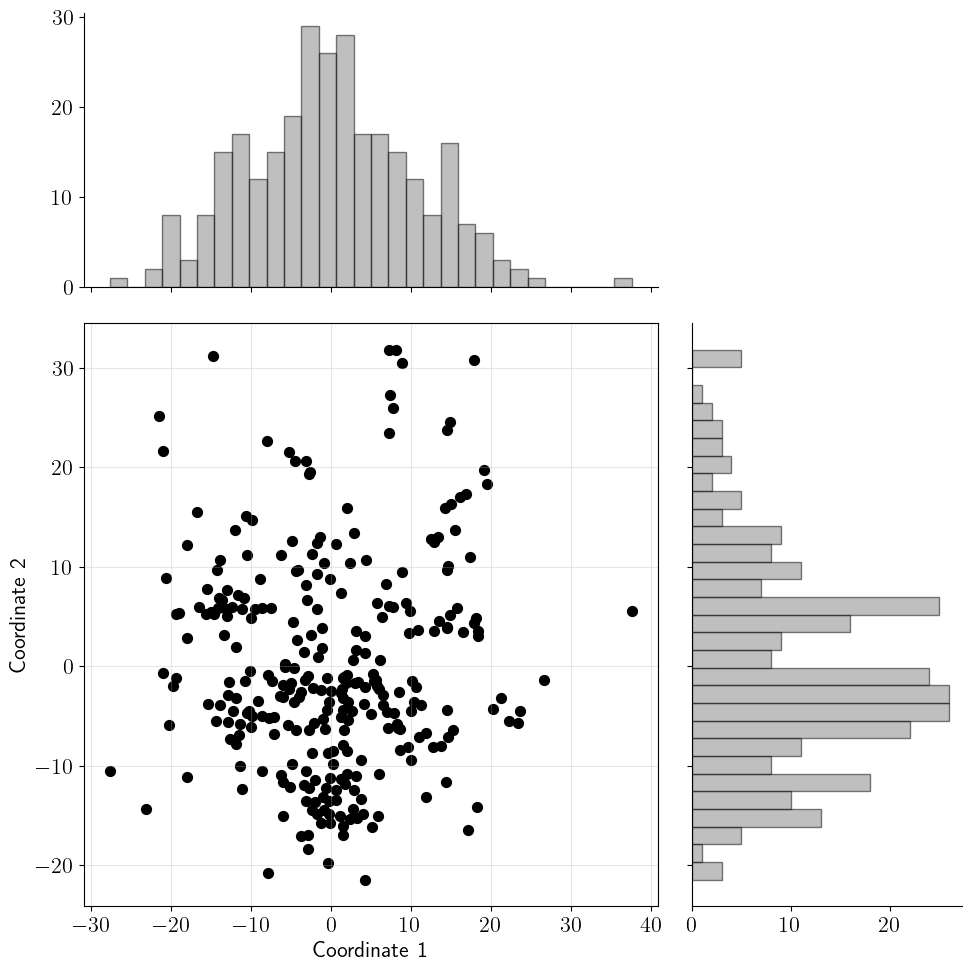

In [13]:
TEC_ClusterSeriesNoise = ClusterMDS(dissimilarity = PTEX_dissim_only_noise)
TEC_ClusterSeriesNoise.ComputeMDS(num_comps_mds = 2, method = "SMACOF-dissim-classic", max_iter = 1000, eps = 1e-6, verbose = 0)
TEC_ClusterSeriesNoise.ClusterTSVectors(num_clusters = -1)
TEC_ClusterSeriesNoise.VisualizeClustering()

## Save outliers status for all TEC series

In [14]:
CompleteLabels = np.zeros((PTEX_dissim.shape[0], 2), dtype = int)

TEC_ClusterSeriesNoNoise.ClusterTSVectors(num_clusters = 3, cluster_method = "K-Means")
CompleteLabels[IndexOutliers, :] = -1
CompleteLabels[IndexNotOutliers, 0] = TEC_ClusterSeriesNoNoise.Xc_Labels.reshape(PTEX_dissim_no_noise.shape[0], 1)

for cluster_label in np.unique(TEC_ClusterSeriesNoNoise.Xc_Labels):
    cluster_true_index = IndexNotOutliers[TEC_ClusterSeriesNoNoise.cluster_order[cluster_label]]
    size_cluster = cluster_true_index.size
    CompleteLabels[cluster_true_index, 1] = np.arange(1, size_cluster + 1).reshape(size_cluster, 1)

--Scores with K-Means clustering--
SH coefficient = 0.7553186801400924
CH index = 18687.437115777895
DB index = 0.3655293958173651
--Total series for every cluster--
0 -> 535
1 -> 2387
2 -> 1103


In [15]:
with open("./data/PTEX_2018_2019_clustering.dat", "+w") as OutlierOuts:
    for n, cluster_order in enumerate(CompleteLabels):
        OutlierOuts.write(f"{n}, {cluster_order[0]}, {cluster_order[1]}\n")